In [1]:
!pip install --upgrade torch==1.4.0
!pip install qpth
!pip install tqdm
!pip install torchnet

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

!git clone https://github.com/kjunelee/MetaOptNet.git
!cd /content/MetaOptNet

# Update MetaOptNet/data/mini_imagenet.py line 30:
# _MINI_IMAGENET_DATASET_DIR = '/gdrive/My Drive/Colab Notebooks/CS485'

# Update MetaOptNet/train.py (and ...test.py) if on Colab (only one GPU allocated):
# get_model, line 9:
# network = torch.nn.DataParallel(network, device_ids=[0])

Requirement already up-to-date: torch==1.4.0 in /usr/local/lib/python3.6/dist-packages (1.4.0)
  Created wheel for qpth: filename=qpth-0.0.15-cp36-none-any.whl size=15376 sha256=44f2fa079b96c3da861785e3f2b8e22c66b59614cdf32d599c55aca5e0407d2e
  Stored in directory: /root/.cache/pip/wheels/51/9a/7d/b8f0698533402062185bcb2336954ae5dec581ce0e3fbac82f
Successfully built qpth
     |████████████████████████████████| 686kB 6.8MB/s 
     |████████████████████████████████| 204kB 24.9MB/s 
  Created wheel for torchnet: filename=torchnet-0.0.4-cp36-none-any.whl size=29744 sha256=37a3cdde0ef6925087121592366457402432bcd8745db8a0b71e38a5b5104d6a
  Stored in directory: /root/.cache/pip/wheels/e1/03/fb/1c212c2f20905cdf97fe39022946cf16b8e66ed754a6663400
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655250 sha256=7252f7e414fa4289d30ec303c19f02bbcbf027e1217c178b96bc0b3d4311b849
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618d

In [0]:
# from zipfile import ZipFile
# import os

# path = "/gdrive/My Drive/Colab Notebooks/CS485"
# zipped = os.path.join(path, 'miniImageNet.zip')
# with ZipFile(zipped) as myzip:
#   myzip.extractall(path=path)
# os.listdir(path)

Mounted at /gdrive


['miniImageNet.zip',
 'lsn1.ipynb',
 'cs485_lesson3.ipynb',
 'lesson4.ipynb',
 'homework-1-wjwswain',
 'lesson-06',
 'lesson-08-wjwswain',
 'lesson-12-titanic-wjwswain',
 'lesson-15-wjwswain',
 'homework-2-image-classification-wjwswain',
 'dogs_cats_small',
 'lesson-16-wjwswain',
 'westpoint-neural-networks-topic-demo',
 'lesson-17-wjwswain',
 'raccoon.jpg',
 'miniImageNet_category_split_test.pickle',
 'miniImageNet_category_split_train_phase_test.pickle',
 'miniImageNet_category_split_train_phase_train.pickle',
 'miniImageNet_category_split_train_phase_val.pickle',
 'miniImageNet_category_split_val.pickle']

In [3]:
import torch, torchnet, qpth, tqdm, os

!python /content/MetaOptNet/train.py --gpu 0 --save-path "./experiments/miniImageNet_MetaOptNet_SVM" \
--train-shot 15 --head SVM --network ResNet --dataset miniImageNet --episodes-per-batch 2 --eps 0.1

Loading mini ImageNet dataset - phase train
tcmalloc: large alloc 2166571008 bytes == 0x96f48000 @  0x7f468227a1e7 0x5929fc 0x59972e 0x5dd4c9 0x5dd6f9 0x567322 0x5a5611 0x4de2e3 0x4e04fa 0x5ec32e 0x50a9da 0x50c5b9 0x509d48 0x50aa7d 0x50c5b9 0x508245 0x509642 0x595311 0x54a6ff 0x551b81 0x5aa6ec 0x50abb3 0x50d390 0x509d48 0x50aa7d 0x50c5b9 0x508245 0x50b403 0x635222 0x6352d7 0x638a8f
tcmalloc: large alloc 2166571008 bytes == 0x11817c000 @  0x7f468227a1e7 0x5ac744 0x4de28d 0x4e04fa 0x5ec32e 0x50a9da 0x50c5b9 0x509d48 0x50aa7d 0x50c5b9 0x508245 0x509642 0x595311 0x54a6ff 0x551b81 0x5aa6ec 0x50abb3 0x50d390 0x509d48 0x50aa7d 0x50c5b9 0x508245 0x50b403 0x635222 0x6352d7 0x638a8f 0x639631 0x4b0f40 0x7f4681e77b97 0x5b2fda
tcmalloc: large alloc 2166571008 bytes == 0x199c08000 @  0x7f468227a1e7 0x5929fc 0x62bdde 0x59afe8 0x59b067 0x62c04f 0x4e053d 0x5ec32e 0x50a9da 0x50c5b9 0x509d48 0x50aa7d 0x50c5b9 0x508245 0x509642 0x595311 0x54a6ff 0x551b81 0x5aa6ec 0x50abb3 0x50d390 0x509d48 0x50aa7d 0x50c5

In [6]:
!python /content/MetaOptNet/test.py --gpu 0 --load ./experiments/miniImageNet_MetaOptNet_SVM/best_model.pth --episode 1000 \
--way 5 --shot 1 --query 15 --head SVM --network ResNet --dataset miniImageNet

Loading mini ImageNet dataset - phase test
tcmalloc: large alloc 1085390848 bytes == 0x4d0e2000 @  0x7f8e02d041e7 0x5929fc 0x59972e 0x5dd4c9 0x5dd6f9 0x567322 0x5a5611 0x4de2e3 0x4e04fa 0x5ec32e 0x50a9da 0x50c5b9 0x509d48 0x50aa7d 0x50c5b9 0x508245 0x509642 0x595311 0x54a6ff 0x551b81 0x5aa6ec 0x50abb3 0x50d390 0x509d48 0x50aa7d 0x50c5b9 0x508245 0x50b403 0x635222 0x6352d7 0x638a8f
using gpu: 0
{'gpu': '0', 'load': './experiments/miniImageNet_MetaOptNet_SVM/best_model.pth', 'episode': 1000, 'way': 5, 'shot': 1, 'query': 15, 'network': 'ResNet', 'head': 'SVM', 'dataset': 'miniImageNet'}
  5% 49/1000 [00:08<02:27,  6.43it/s]Episode [50/1000]:			Accuracy: 41.20 ± 2.58 % (50.67 %)
 10% 99/1000 [00:15<02:16,  6.60it/s]Episode [100/1000]:			Accuracy: 41.16 ± 2.01 % (33.33 %)
 15% 149/1000 [00:23<02:06,  6.75it/s]Episode [150/1000]:			Accuracy: 41.56 ± 1.62 % (37.33 %)
 20% 199/1000 [00:31<02:05,  6.37it/s]Episode [200/1000]:			Accuracy: 41.72 ± 1.40 % (21.33 %)
 25% 249/1000 [00:38<01:53,  6.

In [0]:
!python test.py --gpu 0 --load ./experiments/miniImageNet_MetaOptNet_SVM/best_model.pth --episode 1000 \
--way 5 --shot 5 --query 15 --head SVM --network ResNet --dataset miniImageNe

In [0]:
import matplotlib.pyplot as plt
import numpy as np

mnist_dict = {'0':1, '1':3, '2':5, '3':7, '4':2, '5':0, '6':13, '7':15, '8':17, '9':4}

def oneshot_mnist(train_images, train_labels):
  oneshot_images = np.zeros([10,28,28])
  oneshot_labels = np.zeros([10,1])
  for i in range(10):
    print(i)
    idx = mnist_dict[str(i)]
    oneshot_images[i] = train_images[idx]
    oneshot_labels[i] = train_labels[idx]
    plt.imshow(oneshot_images[i])
    plt.show()
  return oneshot_images, oneshot_labels


oneshot_labels = np.array([
[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], 
[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], 
[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], 
[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], 
[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], 
[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], 
[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], 
[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], 
[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], 
[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

0


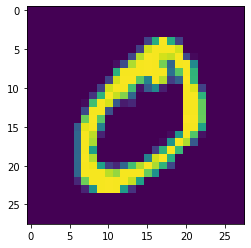

1


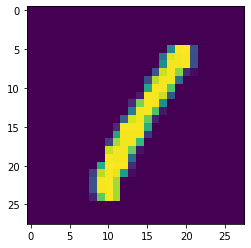

2


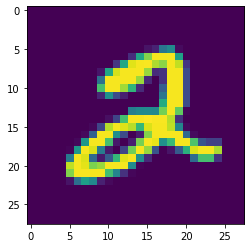

3


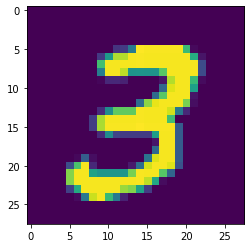

4


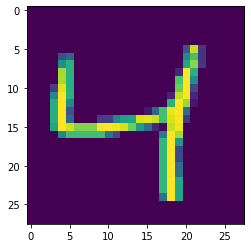

5


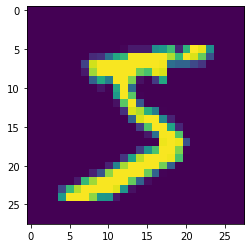

6


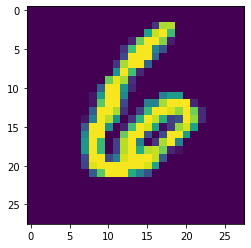

7


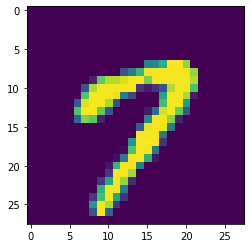

8


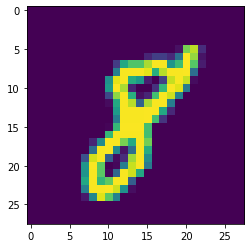

9


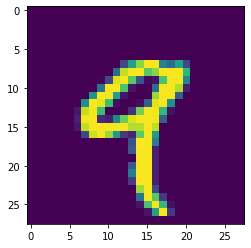

In [23]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

oneshot_images, oneshot_labels = oneshot_mnist(train_images, train_labels)
oneshot_images = oneshot_images.reshape((10, 28, 28, 1))
oneshot_images = oneshot_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

oneshot_labels = to_categorical(oneshot_labels)
test_labels = to_categorical(test_labels)

In [27]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(oneshot_images, oneshot_labels, epochs=10, batch_size=1)

Epoch 1/10
10/10 [==============================] - 0s 28ms/step - loss: 0.0742 - acc: 1.0000
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 3.0574e-04 - acc: 1.0000
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 2.1632e-04 - acc: 1.0000
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 1.5725e-04 - acc: 1.0000
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 1.0977e-04 - acc: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 7.8600e-05 - acc: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 5.6871e-05 - acc: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 4.0002e-05 - acc: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 2.6555e-05 - acc: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 5ms/step - loss: 1.8281e-05 - acc: 1.0000


In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

10000/10000 [==============================] - 1s 59us/step
0.5857
